In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
from dtaidistance import dtw
from fastdtw import fastdtw

In [2]:
segment_dir = 'segment'

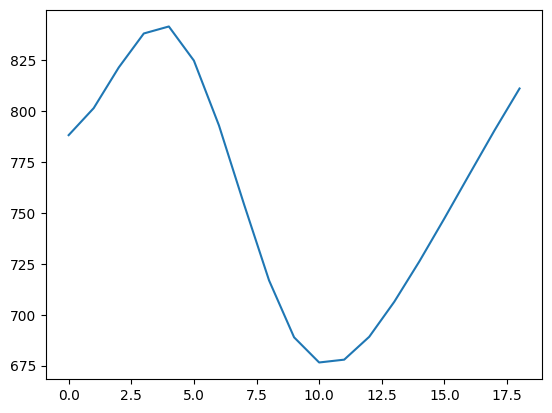

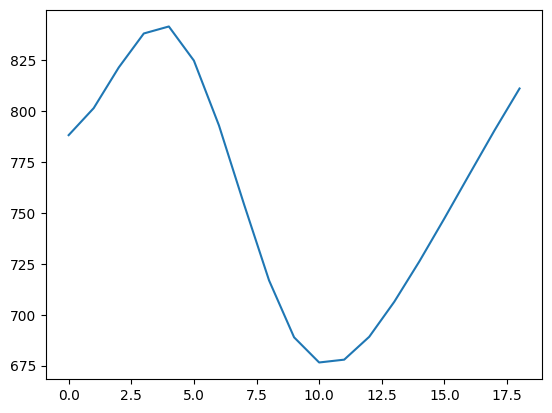

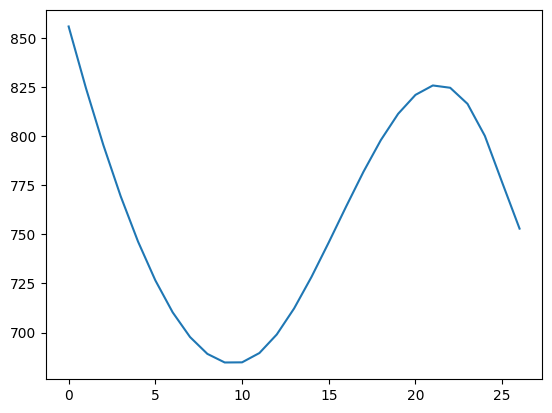

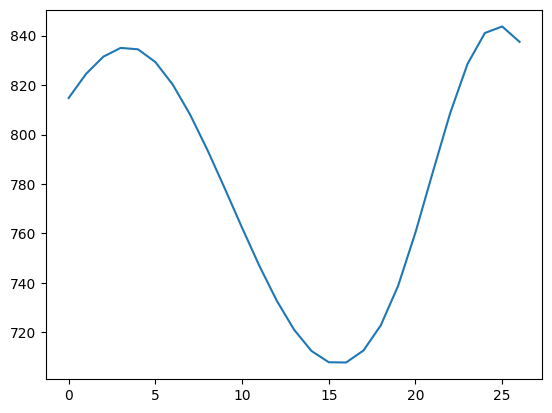

In [63]:
j = 0
for segment1_name in os.listdir(segment_dir):
    if j < 18:
        j += 1
        continue
    x = np.load(os.path.join(segment_dir, segment1_name))

    plt.plot(x)
    plt.show()

    i = 0
    for segment2_name in os.listdir(segment_dir):
        pair = True
        if i < 0:
            i += 1
            continue
        
        y = np.load(os.path.join(segment_dir, segment2_name))

        if abs(len(x) - len(y)) > 10:
            continue

        if abs(np.std(x) - np.std(y)) > 10:
            continue
        rad = int(len(y) / 20)
        if rad < 2:
            rad = 1
        distance, paths = fastdtw(x, y, radius=rad)
        if distance > 500:
            continue

        if not pair:
            continue

        plt.plot(y)
        plt.show()
    break